In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 77.8 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import pyproj

In [ ]:
import logging
logging.getLogger("urllib3").setLevel(logging.ERROR)

In [7]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import folium

In [ ]:
# 서울시 전동킥보드 견인 현황
es_tow = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/서울시 전동킥보드 견인 현황.csv', encoding = 'euc-kr')
es_tow.head()

,번호,신고일시,구정보,주소,유형,조치일
0,9999,2021-10-15,송파구,서울특별시 송파구 오금동 89-7,"점자블록, 엘리베이터 입구",2021-10-15
1,9998,2021-10-15,송파구,서울특별시 송파구 장지동 850,"점자블록, 엘리베이터 입구",2021-10-15
2,9997,2021-10-15,동작구,서울특별시 동작구 사당동 583-11,"점자블록, 엘리베이터 입구",2021-10-15
3,9996,2021-10-15,관악구,서울특별시 관악구 봉천동 979-1,지하철역 진출입로 및 주변,2021-10-15
4,9995,2021-10-15,관악구,서울특별시 관악구 봉천동 1693-39,"횡단보도, 산책로 등",2021-10-15


In [ ]:
es_tow.tail()

,번호,신고일시,구정보,주소,유형,조치일
60600,10000,2021-10-15,관악구,서울특별시 관악구 봉천동 1685-42,"버스정류장, 택시 승강장",2021-10-15
60601,1000,2021-07-27,마포구,서울특별시 마포구 망원동 452-1,보도와 차도가 구분된 도로의 차도,2021-07-27
60602,100,2021-07-16,마포구,서울특별시 마포구 서교동 446-16,보도와 차도가 구분된 도로의 차도,2021-07-16
60603,10,2021-07-15,동작구,서울특별시 동작구 상도동 159-275,기타,2021-07-20
60604,1,2021-07-15,동작구,서울특별시 동작구 상도동 215-45,"점자블록, 엘리베이터 입구",2021-07-15


# 서울특별시 구 이미지

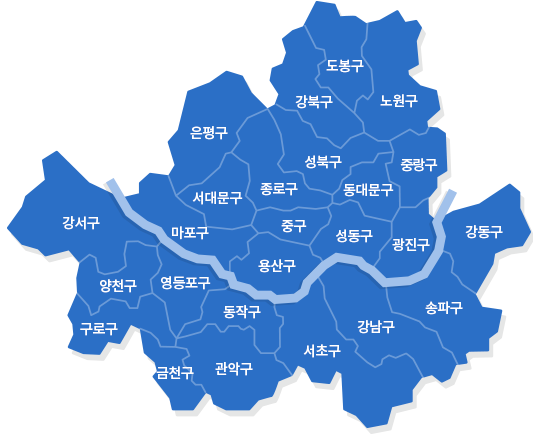

In [ ]:
# 강동구(40분 정도 소요)
es_tow_강동구 = es_tow[es_tow['구정보'].str.contains('강동구')]
es_tow_강동구.shape

(2294, 6)

In [ ]:
# 송파구(?)
es_tow_송파구 = es_tow[es_tow['구정보'].str.contains('송파구')]
es_tow_송파구.shape

(6492, 6)

In [ ]:
# 강남구(3시간 22분 정도 소요)
es_tow_강남구 = es_tow[es_tow['구정보'].str.contains('강남구')]
es_tow_강남구.shape

(3234, 6)

In [ ]:
# 서초구(총 소요시간이 안떠서 확인 불가)
es_tow_서초구 = es_tow[es_tow['구정보'].str.contains('서초구')]
es_tow_서초구.shape

(3316, 6)

In [ ]:
# 동작구(1시간 6분 소요)
es_tow_동작구 = es_tow[es_tow['구정보'].str.contains('동작구')]
es_tow_동작구.shape

(3949, 6)

In [ ]:
# 관악구(1시간 4분 소요))
es_tow_관악구 = es_tow[es_tow['구정보'].str.contains('관악구')]
es_tow_관악구.shape

(3877, 6)

In [ ]:
# 영등포구(1시간 30분 소요)
es_tow_영등포구 = es_tow[es_tow['구정보'].str.contains('영등포구')]
es_tow_영등포구.shape

(5381, 6)

In [ ]:
# 금천구(1초)
es_tow_금천구 = es_tow[es_tow['구정보'].str.contains('금천구')]
es_tow_금천구.shape

(2, 6)

In [ ]:
# 강서구(41분 소요)
es_tow_강서구 = es_tow[es_tow['구정보'].str.contains('강서구')]
es_tow_강서구.shape

(2481, 6)

In [ ]:
# 양천구(20분 소요)
es_tow_양천구 = es_tow[es_tow['구정보'].str.contains('양천구')]
es_tow_양천구.shape

(1242, 6)

In [ ]:
# 구로구(23분 소요)
es_tow_구로구 = es_tow[es_tow['구정보'].str.contains('구로구')]
es_tow_구로구.shape

(1373, 6)

In [ ]:
# 도봉구(?)
es_tow_도봉구 = es_tow[es_tow['구정보'].str.contains('도봉구')]
es_tow_도봉구.shape

(1387, 6)

In [ ]:
# 강북구(?)
es_tow_강북구 = es_tow[es_tow['구정보'].str.contains('강북구')]
es_tow_강북구.shape

(528, 6)

In [ ]:
# 노원구(17분 소요)
es_tow_노원구 = es_tow[es_tow['구정보'].str.contains('노원구')]
es_tow_노원구.shape

(1032, 6)

In [ ]:
# 성북구(11분 소요)
es_tow_성북구 = es_tow[es_tow['구정보'].str.contains('성북구')]
es_tow_성북구.shape

(706, 6)

In [ ]:
# 동대문구(34분 소요)
es_tow_동대문구 = es_tow[es_tow['구정보'].str.contains('동대문구')]
es_tow_동대문구.shape

(2023, 6)

In [ ]:
# 중랑구(28분 소요)
es_tow_중랑구 = es_tow[es_tow['구정보'].str.contains('중랑구')]
es_tow_중랑구.shape

(1683, 6)

In [ ]:
# 광진구(45분 소요)
es_tow_광진구 = es_tow[es_tow['구정보'].str.contains('광진구')]
es_tow_광진구.shape

(2690, 6)

In [ ]:
# 성동구(1시간 9분 소요)
es_tow_성동구 = es_tow[es_tow['구정보'].str.contains('성동구')]
es_tow_성동구.shape

(4119, 6)

In [ ]:
# 용산구(28분 소요)
es_tow_용산구 = es_tow[es_tow['구정보'].str.contains('용산구')]
es_tow_용산구.shape

(1701, 6)

In [ ]:
# 중구(15분 소요)
es_tow_중구 = es_tow[es_tow['구정보'].str.contains('중구')]
es_tow_중구.shape

(915, 6)

In [ ]:
# 종로구(17분 소요)
es_tow_종로구 = es_tow[es_tow['구정보'].str.contains('종로구')]
es_tow_종로구.shape

(998, 6)

In [ ]:
# 은평구(6분 소요)
es_tow_은평구 = es_tow[es_tow['구정보'].str.contains('은평구')]
es_tow_은평구.shape

(343, 6)

In [ ]:
# 서대문구(24분 소요)
es_tow_서대문구 = es_tow[es_tow['구정보'].str.contains('서대문구')]
es_tow_서대문구.shape

(1431, 6)

In [ ]:
# 마포구(2시간 3분 소요)
es_tow_마포구 = es_tow[es_tow['구정보'].str.contains('마포구')]
es_tow_마포구.shape

(7408, 6)

In [ ]:
####### 도로명주소 위도 경도 값으로 바꿔주기 ########
from geopy.geocoders import Nominatim
geo_local = Nominatim(user_agent='South Korea')

In [ ]:
'''
# _강동구
es_tow_address_강동구 = es_tow_강동구['주소']

# 위도, 경도 반환하는 함수
def geocoding(es_tow_address_강동구):
    try:
        geo = geo_local.geocode(es_tow_address_강동구)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]


latitude_es_tow_강동구 = []
longitude_es_tow_강동구 = []

for i in es_tow_address_강동구:
    latitude_es_tow_강동구.append(geocoding(i)[0])
    longitude_es_tow_강동구.append(geocoding(i)[1])

#####Dataframe만들기######
es_tow_address_강동구_df = pd.DataFrame({'구정보': es_tow_강동구['구정보'],'주소': es_tow_강동구['주소'], 
                                      '유형': es_tow_강동구['유형'], '위도':latitude_es_tow_강동구, '경도':longitude_es_tow_강동구})

#df저장
es_tow_address_강동구_df.to_csv('/content/drive/MyDrive/캡스톤디자인/data/강동구_견인현황_위경도.csv')
'''

In [ ]:
'''
#df저장
es_tow_address_강동구_df.to_csv('/content/drive/MyDrive/캡스톤디자인/data/강동구_견인현황_위경도.csv')
'''

In [ ]:
'''
# _송파구
es_tow_address_송파구 = es_tow_송파구['주소']

# 위도, 경도 반환하는 함수
def geocoding(es_tow_address_송파구):
    try:
        geo = geo_local.geocode(es_tow_address_송파구)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

#####주소를 위,경도 값으로 변환하기 #####
##### 오래걸림 ######
latitude_es_tow_송파구 = []
longitude_es_tow_송파구 = []

for i in es_tow_address_송파구:
    latitude_es_tow_송파구.append(geocoding(i)[0])
    longitude_es_tow_송파구.append(geocoding(i)[1])

#####Dataframe만들기######
es_tow_address_송파구_df = pd.DataFrame({'구정보': es_tow_송파구['구정보'],'주소': es_tow_송파구['주소'], '유형': es_tow_송파구['유형'], '위도':latitude_es_tow_송파구, '경도':longitude_es_tow_송파구})

#df저장
es_tow_address_송파구_df.to_csv('/content/drive/MyDrive/캡스톤디자인/data/송파구_견인현황_위경도.csv')
'''

In [ ]:
'''
# _강남구
es_tow_address_강남구 = es_tow_강남구['주소']

# 위도, 경도 반환하는 함수
def geocoding(es_tow_address_강남구):
    try:
        geo = geo_local.geocode(es_tow_address_강남구)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

#####주소를 위,경도 값으로 변환하기 #####
##### 오래걸림 ######
latitude_es_tow_강남구 = []
longitude_es_tow_강남구 = []

for i in es_tow_address_강남구:
    latitude_es_tow_강남구.append(geocoding(i)[0])
    longitude_es_tow_강남구.append(geocoding(i)[1])

#####Dataframe만들기######
es_tow_address_강남구_df = pd.DataFrame({'구정보': es_tow_강남구['구정보'],'주소': es_tow_강남구['주소'], '유형': es_tow_강남구['유형'], '위도':latitude_es_tow_강남구, '경도':longitude_es_tow_강남구})

#df저장
es_tow_address_강남구_df.to_csv('/content/drive/MyDrive/캡스톤디자인/data/강남구_견인현황_위경도.csv')
'''

In [ ]:
'''
# _서초구
es_tow_address_서초구 = es_tow_서초구['주소']

# 위도, 경도 반환하는 함수
def geocoding(es_tow_address_서초구):
    try:
        geo = geo_local.geocode(es_tow_address_서초구)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

#####주소를 위,경도 값으로 변환하기 #####
##### 오래걸림 ######
latitude_es_tow_서초구 = []
longitude_es_tow_서초구 = []

for i in es_tow_address_서초구:
    latitude_es_tow_서초구.append(geocoding(i)[0])
    longitude_es_tow_서초구.append(geocoding(i)[1])

#####Dataframe만들기######
es_tow_address_서초구_df = pd.DataFrame({'구정보': es_tow_서초구['구정보'],'주소': es_tow_서초구['주소'], '유형': es_tow_서초구['유형'], '위도':latitude_es_tow_서초구, '경도':longitude_es_tow_서초구})

#df저장
es_tow_address_서초구_df.to_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/서초구_견인현황_위경도.csv')
'''

In [ ]:
'''
# _동작구
es_tow_address_동작구 = es_tow_동작구['주소']

# 위도, 경도 반환하는 함수
def geocoding(es_tow_address_동작구):
    try:
        geo = geo_local.geocode(es_tow_address_동작구)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

#####주소를 위,경도 값으로 변환하기 #####
##### 오래걸림 ######
latitude_es_tow_동작구 = []
longitude_es_tow_동작구 = []

for i in es_tow_address_동작구:
    latitude_es_tow_동작구.append(geocoding(i)[0])
    longitude_es_tow_동작구.append(geocoding(i)[1])

#####Dataframe만들기######
es_tow_address_동작구_df = pd.DataFrame({'구정보': es_tow_동작구['구정보'],'주소': es_tow_동작구['주소'], '유형': es_tow_동작구['유형'], '위도':latitude_es_tow_동작구, '경도':longitude_es_tow_동작구})

#df저장
es_tow_address_동작구_df.to_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/동작구_견인현황_위경도.csv')
'''

In [ ]:
'''
# _관악구
es_tow_address_관악구 = es_tow_관악구['주소']

# 위도, 경도 반환하는 함수
def geocoding(es_tow_address_관악구):
    try:
        geo = geo_local.geocode(es_tow_address_관악구)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

#####주소를 위,경도 값으로 변환하기 #####
##### 오래걸림 ######
latitude_es_tow_관악구 = []
longitude_es_tow_관악구 = []

for i in es_tow_address_관악구:
    latitude_es_tow_관악구.append(geocoding(i)[0])
    longitude_es_tow_관악구.append(geocoding(i)[1])

#####Dataframe만들기######
es_tow_address_관악구_df = pd.DataFrame({'구정보': es_tow_관악구['구정보'],'주소': es_tow_관악구['주소'], '유형': es_tow_관악구['유형'], '위도':latitude_es_tow_관악구, '경도':longitude_es_tow_관악구})

#df저장
es_tow_address_관악구_df.to_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/관악구_견인현황_위경도.csv')
'''

In [ ]:
'''
# _영등포구
es_tow_address_영등포구 = es_tow_영등포구['주소']

# 위도, 경도 반환하는 함수
def geocoding(es_tow_address_영등포구):
    try:
        geo = geo_local.geocode(es_tow_address_영등포구)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

#####주소를 위,경도 값으로 변환하기 #####
##### 오래걸림 ######
latitude_es_tow_영등포구 = []
longitude_es_tow_영등포구 = []

for i in es_tow_address_영등포구:
    latitude_es_tow_영등포구.append(geocoding(i)[0])
    longitude_es_tow_영등포구.append(geocoding(i)[1])

#####Dataframe만들기######
es_tow_address_영등포구_df = pd.DataFrame({'구정보': es_tow_영등포구['구정보'],'주소': es_tow_영등포구['주소'], '유형': es_tow_영등포구['유형'], '위도':latitude_es_tow_영등포구, '경도':longitude_es_tow_영등포구})

#df저장
es_tow_address_영등포구_df.to_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/영등포구_견인현황_위경도.csv')
'''

In [ ]:
'''
# _금천구
es_tow_address_금천구 = es_tow_금천구['주소']

# 위도, 경도 반환하는 함수
def geocoding(es_tow_address_금천구):
    try:
        geo = geo_local.geocode(es_tow_address_금천구)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

#####주소를 위,경도 값으로 변환하기 #####
##### 오래걸림 ######
latitude_es_tow_금천구 = []
longitude_es_tow_금천구 = []

for i in es_tow_address_금천구:
    latitude_es_tow_금천구.append(geocoding(i)[0])
    longitude_es_tow_금천구.append(geocoding(i)[1])

#####Dataframe만들기######
es_tow_address_금천구_df = pd.DataFrame({'구정보': es_tow_금천구['구정보'],'주소': es_tow_금천구['주소'], '유형': es_tow_금천구['유형'], '위도':latitude_es_tow_금천구, '경도':longitude_es_tow_금천구})

#df저장
es_tow_address_금천구_df.to_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/금천구_견인현황_위경도.csv')
'''

In [ ]:
'''
# _강서구
es_tow_address_강서구 = es_tow_강서구['주소']

# 위도, 경도 반환하는 함수
def geocoding(es_tow_address_강서구):
    try:
        geo = geo_local.geocode(es_tow_address_강서구)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

#####주소를 위,경도 값으로 변환하기 #####
##### 오래걸림 ######
latitude_es_tow_강서구 = []
longitude_es_tow_강서구 = []

for i in es_tow_address_강서구:
    latitude_es_tow_강서구.append(geocoding(i)[0])
    longitude_es_tow_강서구.append(geocoding(i)[1])

#####Dataframe만들기######
es_tow_address_강서구_df = pd.DataFrame({'구정보': es_tow_강서구['구정보'],'주소': es_tow_강서구['주소'], '유형': es_tow_강서구['유형'], '위도':latitude_es_tow_강서구, '경도':longitude_es_tow_강서구})

#df저장
es_tow_address_강서구_df.to_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/강서구_견인현황_위경도.csv')
'''

In [ ]:
'''
# _양천구
es_tow_address_양천구 = es_tow_양천구['주소']

# 위도, 경도 반환하는 함수
def geocoding(es_tow_address_양천구):
    try:
        geo = geo_local.geocode(es_tow_address_양천구)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

#####주소를 위,경도 값으로 변환하기 #####
##### 오래걸림 ######
latitude_es_tow_양천구 = []
longitude_es_tow_양천구 = []

for i in es_tow_address_양천구:
    latitude_es_tow_양천구.append(geocoding(i)[0])
    longitude_es_tow_양천구.append(geocoding(i)[1])

#####Dataframe만들기######
es_tow_address_양천구_df = pd.DataFrame({'구정보': es_tow_양천구['구정보'],'주소': es_tow_양천구['주소'], '유형': es_tow_양천구['유형'], '위도':latitude_es_tow_양천구, '경도':longitude_es_tow_양천구})

#df저장
es_tow_address_양천구_df.to_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/양천구_견인현황_위경도.csv')
'''

In [ ]:
'''
# _구로구
es_tow_address_구로구 = es_tow_구로구['주소']

# 위도, 경도 반환하는 함수
def geocoding(es_tow_address_구로구):
    try:
        geo = geo_local.geocode(es_tow_address_구로구)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

#####주소를 위,경도 값으로 변환하기 #####
##### 오래걸림 ######
latitude_es_tow_구로구 = []
longitude_es_tow_구로구 = []

for i in es_tow_address_구로구:
    latitude_es_tow_구로구.append(geocoding(i)[0])
    longitude_es_tow_구로구.append(geocoding(i)[1])

#####Dataframe만들기######
es_tow_address_구로구_df = pd.DataFrame({'구정보': es_tow_구로구['구정보'],'주소': es_tow_구로구['주소'], '유형': es_tow_구로구['유형'], '위도':latitude_es_tow_구로구, '경도':longitude_es_tow_구로구})

#df저장
es_tow_address_구로구_df.to_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/구로구_견인현황_위경도.csv')
'''

In [ ]:
'''
# _도봉구
es_tow_address_도봉구 = es_tow_도봉구['주소']

# 위도, 경도 반환하는 함수
def geocoding(es_tow_address_도봉구):
    try:
        geo = geo_local.geocode(es_tow_address_도봉구)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

#####주소를 위,경도 값으로 변환하기 #####
##### 오래걸림 ######
latitude_es_tow_도봉구 = []
longitude_es_tow_도봉구 = []

for i in es_tow_address_도봉구:
    latitude_es_tow_도봉구.append(geocoding(i)[0])
    longitude_es_tow_도봉구.append(geocoding(i)[1])

#####Dataframe만들기######
es_tow_address_도봉구_df = pd.DataFrame({'구정보': es_tow_도봉구['구정보'],'주소': es_tow_도봉구['주소'], '유형': es_tow_도봉구['유형'], '위도':latitude_es_tow_도봉구, '경도':longitude_es_tow_도봉구})

#df저장
es_tow_address_도봉구_df.to_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/도봉구_견인현황_위경도.csv')
'''

In [ ]:
'''
# _강북구
es_tow_address_강북구 = es_tow_강북구['주소']

# 위도, 경도 반환하는 함수
def geocoding(es_tow_address_강북구):
    try:
        geo = geo_local.geocode(es_tow_address_강북구)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

#####주소를 위,경도 값으로 변환하기 #####
##### 오래걸림 ######
latitude_es_tow_강북구 = []
longitude_es_tow_강북구 = []

for i in es_tow_address_강북구:
    latitude_es_tow_강북구.append(geocoding(i)[0])
    longitude_es_tow_강북구.append(geocoding(i)[1])

#####Dataframe만들기######
es_tow_address_강북구_df = pd.DataFrame({'구정보': es_tow_강북구['구정보'],'주소': es_tow_강북구['주소'], '유형': es_tow_강북구['유형'], '위도':latitude_es_tow_강북구, '경도':longitude_es_tow_강북구})

#df저장
es_tow_address_강북구_df.to_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/강북구_견인현황_위경도.csv')
'''

In [ ]:
'''
# _노원구
es_tow_address_노원구 = es_tow_노원구['주소']

# 위도, 경도 반환하는 함수
def geocoding(es_tow_address_노원구):
    try:
        geo = geo_local.geocode(es_tow_address_노원구)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

#####주소를 위,경도 값으로 변환하기 #####
##### 오래걸림 ######
latitude_es_tow_노원구 = []
longitude_es_tow_노원구 = []

for i in es_tow_address_노원구:
    latitude_es_tow_노원구.append(geocoding(i)[0])
    longitude_es_tow_노원구.append(geocoding(i)[1])

#####Dataframe만들기######
es_tow_address_노원구_df = pd.DataFrame({'구정보': es_tow_노원구['구정보'],'주소': es_tow_노원구['주소'], '유형': es_tow_노원구['유형'], '위도':latitude_es_tow_노원구, '경도':longitude_es_tow_노원구})

#df저장
es_tow_address_노원구_df.to_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/노원구_견인현황_위경도.csv')
'''

In [ ]:
'''
# _성북구
es_tow_address_성북구 = es_tow_성북구['주소']

# 위도, 경도 반환하는 함수
def geocoding(es_tow_address_성북구):
    try:
        geo = geo_local.geocode(es_tow_address_성북구)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

#####주소를 위,경도 값으로 변환하기 #####
##### 오래걸림 ######
latitude_es_tow_성북구 = []
longitude_es_tow_성북구 = []

for i in es_tow_address_성북구:
    latitude_es_tow_성북구.append(geocoding(i)[0])
    longitude_es_tow_성북구.append(geocoding(i)[1])

#####Dataframe만들기######
es_tow_address_성북구_df = pd.DataFrame({'구정보': es_tow_성북구['구정보'],'주소': es_tow_성북구['주소'], '유형': es_tow_성북구['유형'], '위도':latitude_es_tow_성북구, '경도':longitude_es_tow_성북구})

#df저장
es_tow_address_성북구_df.to_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/성북구_견인현황_위경도.csv')
'''

In [ ]:
'''
# _동대문구
es_tow_address_동대문구 = es_tow_동대문구['주소']

# 위도, 경도 반환하는 함수
def geocoding(es_tow_address_동대문구):
    try:
        geo = geo_local.geocode(es_tow_address_동대문구)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

#####주소를 위,경도 값으로 변환하기 #####
##### 오래걸림 ######
latitude_es_tow_동대문구 = []
longitude_es_tow_동대문구 = []

for i in es_tow_address_동대문구:
    latitude_es_tow_동대문구.append(geocoding(i)[0])
    longitude_es_tow_동대문구.append(geocoding(i)[1])

#####Dataframe만들기######
es_tow_address_동대문구_df = pd.DataFrame({'구정보': es_tow_동대문구['구정보'],'주소': es_tow_동대문구['주소'], '유형': es_tow_동대문구['유형'], '위도':latitude_es_tow_동대문구, '경도':longitude_es_tow_동대문구})

#df저장
es_tow_address_동대문구_df.to_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/동대문구_견인현황_위경도.csv')
'''

In [ ]:
'''
# _중랑구
es_tow_address_중랑구 = es_tow_중랑구['주소']

# 위도, 경도 반환하는 함수
def geocoding(es_tow_address_중랑구):
    try:
        geo = geo_local.geocode(es_tow_address_중랑구)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

#####주소를 위,경도 값으로 변환하기 #####
##### 오래걸림 ######
latitude_es_tow_중랑구 = []
longitude_es_tow_중랑구 = []

for i in es_tow_address_중랑구:
    latitude_es_tow_중랑구.append(geocoding(i)[0])
    longitude_es_tow_중랑구.append(geocoding(i)[1])

#####Dataframe만들기######
es_tow_address_중랑구_df = pd.DataFrame({'구정보': es_tow_중랑구['구정보'],'주소': es_tow_중랑구['주소'], '유형': es_tow_중랑구['유형'], '위도':latitude_es_tow_중랑구, '경도':longitude_es_tow_중랑구})

#df저장
es_tow_address_중랑구_df.to_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/중랑구_견인현황_위경도.csv')
'''

In [ ]:
'''
# _광진구
es_tow_address_광진구 = es_tow_광진구['주소']

# 위도, 경도 반환하는 함수
def geocoding(es_tow_address_광진구):
    try:
        geo = geo_local.geocode(es_tow_address_광진구)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

#####주소를 위,경도 값으로 변환하기 #####
##### 오래걸림 ######
latitude_es_tow_광진구 = []
longitude_es_tow_광진구 = []

for i in es_tow_address_광진구:
    latitude_es_tow_광진구.append(geocoding(i)[0])
    longitude_es_tow_광진구.append(geocoding(i)[1])

#####Dataframe만들기######
es_tow_address_광진구_df = pd.DataFrame({'구정보': es_tow_광진구['구정보'],'주소': es_tow_광진구['주소'], '유형': es_tow_광진구['유형'], '위도':latitude_es_tow_광진구, '경도':longitude_es_tow_광진구})

#df저장
es_tow_address_광진구_df.to_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/광진구_견인현황_위경도.csv')
'''

In [ ]:
'''
# _성동구
es_tow_address_성동구 = es_tow_성동구['주소']

# 위도, 경도 반환하는 함수
def geocoding(es_tow_address_성동구):
    try:
        geo = geo_local.geocode(es_tow_address_성동구)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

#####주소를 위,경도 값으로 변환하기 #####
##### 오래걸림 ######
latitude_es_tow_성동구 = []
longitude_es_tow_성동구 = []

for i in es_tow_address_성동구:
    latitude_es_tow_성동구.append(geocoding(i)[0])
    longitude_es_tow_성동구.append(geocoding(i)[1])

#####Dataframe만들기######
es_tow_address_성동구_df = pd.DataFrame({'구정보': es_tow_성동구['구정보'],'주소': es_tow_성동구['주소'], '유형': es_tow_성동구['유형'], '위도':latitude_es_tow_성동구, '경도':longitude_es_tow_성동구})

#df저장
es_tow_address_성동구_df.to_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/성동구_견인현황_위경도.csv')
'''

In [ ]:
'''
# _용산구
es_tow_address_용산구 = es_tow_용산구['주소']

# 위도, 경도 반환하는 함수
def geocoding(es_tow_address_용산구):
    try:
        geo = geo_local.geocode(es_tow_address_용산구)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

#####주소를 위,경도 값으로 변환하기 #####
##### 오래걸림 ######
latitude_es_tow_용산구 = []
longitude_es_tow_용산구 = []

for i in es_tow_address_용산구:
    latitude_es_tow_용산구.append(geocoding(i)[0])
    longitude_es_tow_용산구.append(geocoding(i)[1])

#####Dataframe만들기######
es_tow_address_용산구_df = pd.DataFrame({'구정보': es_tow_용산구['구정보'],'주소': es_tow_용산구['주소'], '유형': es_tow_용산구['유형'], '위도':latitude_es_tow_용산구, '경도':longitude_es_tow_용산구})

#df저장
es_tow_address_용산구_df.to_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/용산구_견인현황_위경도.csv')
'''

In [ ]:
'''
# _중구
es_tow_address_중구 = es_tow_중구['주소']

# 위도, 경도 반환하는 함수
def geocoding(es_tow_address_중구):
    try:
        geo = geo_local.geocode(es_tow_address_중구)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

#####주소를 위,경도 값으로 변환하기 #####
##### 오래걸림 ######
latitude_es_tow_중구 = []
longitude_es_tow_중구 = []

for i in es_tow_address_중구:
    latitude_es_tow_중구.append(geocoding(i)[0])
    longitude_es_tow_중구.append(geocoding(i)[1])

#####Dataframe만들기######
es_tow_address_중구_df = pd.DataFrame({'구정보': es_tow_중구['구정보'],'주소': es_tow_중구['주소'], '유형': es_tow_중구['유형'], '위도':latitude_es_tow_중구, '경도':longitude_es_tow_중구})

#df저장
es_tow_address_중구_df.to_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/중구_견인현황_위경도.csv')
'''

In [ ]:
'''
# _종로구
es_tow_address_종로구 = es_tow_종로구['주소']

# 위도, 경도 반환하는 함수
def geocoding(es_tow_address_종로구):
    try:
        geo = geo_local.geocode(es_tow_address_종로구)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

#####주소를 위,경도 값으로 변환하기 #####
##### 오래걸림 ######
latitude_es_tow_종로구 = []
longitude_es_tow_종로구 = []

for i in es_tow_address_종로구:
    latitude_es_tow_종로구.append(geocoding(i)[0])
    longitude_es_tow_종로구.append(geocoding(i)[1])

#####Dataframe만들기######
es_tow_address_종로구_df = pd.DataFrame({'구정보': es_tow_종로구['구정보'],'주소': es_tow_종로구['주소'], '유형': es_tow_종로구['유형'], '위도':latitude_es_tow_종로구, '경도':longitude_es_tow_종로구})

#df저장
es_tow_address_종로구_df.to_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/종로구_견인현황_위경도.csv')
'''

In [ ]:
'''
# _은평구
es_tow_address_은평구 = es_tow_은평구['주소']

# 위도, 경도 반환하는 함수
def geocoding(es_tow_address_은평구):
    try:
        geo = geo_local.geocode(es_tow_address_은평구)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

#####주소를 위,경도 값으로 변환하기 #####
##### 오래걸림 ######
latitude_es_tow_은평구 = []
longitude_es_tow_은평구 = []

for i in es_tow_address_은평구:
    latitude_es_tow_은평구.append(geocoding(i)[0])
    longitude_es_tow_은평구.append(geocoding(i)[1])

#####Dataframe만들기######
es_tow_address_은평구_df = pd.DataFrame({'구정보': es_tow_은평구['구정보'],'주소': es_tow_은평구['주소'], '유형': es_tow_은평구['유형'], '위도':latitude_es_tow_은평구, '경도':longitude_es_tow_은평구})

#df저장
es_tow_address_은평구_df.to_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/은평구_견인현황_위경도.csv')
'''

In [ ]:
'''
# _서대문구
es_tow_address_서대문구 = es_tow_서대문구['주소']

# 위도, 경도 반환하는 함수
def geocoding(es_tow_address_서대문구):
    try:
        geo = geo_local.geocode(es_tow_address_서대문구)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

#####주소를 위,경도 값으로 변환하기 #####
##### 오래걸림 ######
latitude_es_tow_서대문구 = []
longitude_es_tow_서대문구 = []

for i in es_tow_address_서대문구:
    latitude_es_tow_서대문구.append(geocoding(i)[0])
    longitude_es_tow_서대문구.append(geocoding(i)[1])

#####Dataframe만들기######
es_tow_address_서대문구_df = pd.DataFrame({'구정보': es_tow_서대문구['구정보'],'주소': es_tow_서대문구['주소'], '유형': es_tow_서대문구['유형'], '위도':latitude_es_tow_서대문구, '경도':longitude_es_tow_서대문구})

#df저장
es_tow_address_서대문구_df.to_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/서대문구_견인현황_위경도.csv')
'''

In [ ]:
'''
# _마포구
es_tow_address_마포구 = es_tow_마포구['주소']

# 위도, 경도 반환하는 함수
def geocoding(es_tow_address_마포구):
    try:
        geo = geo_local.geocode(es_tow_address_마포구)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

#####주소를 위,경도 값으로 변환하기 #####
##### 오래걸림 ######
latitude_es_tow_마포구 = []
longitude_es_tow_마포구 = []

for i in es_tow_address_마포구:
    latitude_es_tow_마포구.append(geocoding(i)[0])
    longitude_es_tow_마포구.append(geocoding(i)[1])

#####Dataframe만들기######
es_tow_address_마포구_df = pd.DataFrame({'구정보': es_tow_마포구['구정보'],'주소': es_tow_마포구['주소'], '유형': es_tow_마포구['유형'], '위도':latitude_es_tow_마포구, '경도':longitude_es_tow_마포구})

#df저장
es_tow_address_마포구_df.to_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/마포구_견인현황_위경도.csv')
'''

In [5]:
# 데이터를 DataFrame으로 로드
data = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/alldf.csv')

data.head()

,Unnamed: 0.1,Unnamed: 0,구정보,주소,유형,위도,경도
0,0,5608,강남구,서울특별시 강남구 논현동 279-134,보도와 차도가 구분된 도로의 차도,37.515224,127.030121
1,1,5613,강남구,서울특별시 강남구 논현동 279-134,보도와 차도가 구분된 도로의 차도,37.515224,127.030121
2,2,5616,강남구,서울특별시 강남구 논현동 279-134,보도와 차도가 구분된 도로의 차도,37.515224,127.030121
3,3,5697,강남구,서울특별시 강남구 대치동 1004,보도 중앙,37.498920,127.065786
4,4,5699,강남구,서울특별시 강남구 대치동 1004,보도 중앙,37.498920,127.065786


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


클러스터 중심 좌표:
[ 37.52799901 126.89060764]
[3.74882328e+01 1.42108547e-14]
[ 37.5452221  127.07881146]
[ 37.65579639 127.07153817]
[ 37.54268458 126.95613921]
[ 37.51262195 127.12530486]
[ 37.48578207 127.02218614]
[ 37.57376158 127.06091142]
[ 37.54311327 126.85175134]
[ 37.48959671 126.94223586]
[ 37.55527777 126.92571071]
[ 37.59998388 127.08601729]
[ 37.65107405 127.03103206]
[ 37.48902804 127.12195398]
[ 37.57812082 127.02038684]
[ 37.54128982 127.05097358]
[ 37.51847947 126.92325653]
[ 37.5644423  126.98433263]
[ 37.4954928  126.88641168]
[ 37.5455554  127.13773082]
[ 37.57487068 126.90504175]
[ 37.4870225  126.97624571]
[ 37.56153082 127.1680997 ]
[ 37.56661728 126.82228823]
[ 37.50899267 127.08942867]
클러스터별 데이터 개수:
10    5487
9     4382
16    3959
15    3235
13    3077
6     3071
4     2764
2     2618
5     2524
0     2357
8     2284
11    2141
20    1983
7     1981
21    1839
18    1814
12    1798
17    1695
24    1555
14    1114
22     908
19     870
3      804
23     742
1     

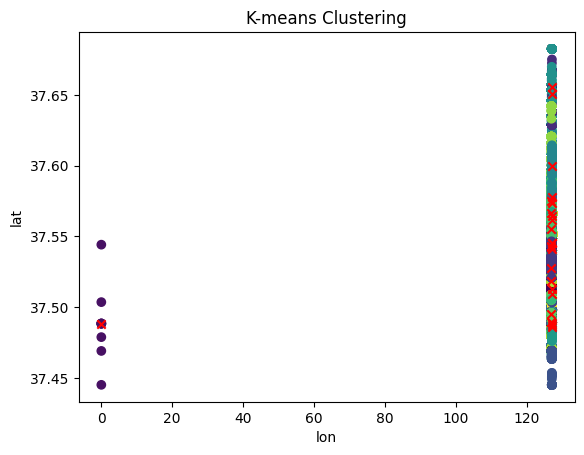

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 데이터를 DataFrame으로 로드
data = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/alldf.csv')

# 필요한 열만 선택하여 사용
selected_data = data[['위도', '경도']]

# k-means 클러스터링 모델 생성
kmeans = KMeans(n_clusters=25)  # 클러스터 개수는 적절히 조정 가능

# 클러스터링 모델에 데이터 학습
kmeans.fit(selected_data)

# 클러스터링 결과 확인
cluster_labels = kmeans.labels_  # 각 데이터 포인트의 클러스터 레이블

# 클러스터링 결과를 데이터프레임에 추가
data['Cluster'] = cluster_labels

# 클러스터 중심 좌표 확인
cluster_centers = kmeans.cluster_centers_
print("클러스터 중심 좌표:")
for center in cluster_centers:
    print(center)

# 클러스터별 데이터 개수 확인
cluster_counts = data['Cluster'].value_counts()
print("클러스터별 데이터 개수:")
print(cluster_counts)

# 클러스터 시각화
plt.scatter(data['경도'], data['위도'], c=data['Cluster'], cmap='viridis')
plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], c='red', marker='x')
plt.xlabel('lon')  # 경도
plt.ylabel('lat')  # 위도
plt.title('K-means Clustering')
plt.show()


In [11]:
# 클러스터링 결과 데이터프레임
clustered_data = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/위 경도 변환/k-means.csv', encoding = 'euc-kr') # 클러스터링 결과 데이터프레임을 할당하세요

clustered_data = clustered_data.loc[:24]
selected_columns = ['위도', '경도', '클러스터별 데이터 개수']
clustered_data = clustered_data[selected_columns]
clustered_data

,위도,경도,클러스터별 데이터 개수
0,37.527999,126.890608,5487.0
1,37.488233,126.421085,4382.0
2,37.545222,127.078811,3959.0
3,37.655796,127.071538,3235.0
4,37.542685,126.956139,3077.0
5,37.512622,127.125305,3071.0
6,37.485782,127.022186,2764.0
7,37.573762,127.060911,2618.0
8,37.543113,126.851751,2524.0
9,37.489597,126.942236,2357.0


In [12]:
import folium


# 지도 중심 좌표 설정 (예: 서울)
center_lat = 37.5665
center_lng = 126.9780

# Folium 지도 객체 생성
m = folium.Map(location=[center_lat, center_lng],  tiles="cartodbpositron", zoom_start=10)

# 클러스터별로 마커 추가
for index, row in clustered_data.iterrows():
    folium.Marker(location=[row['위도'], row['경도']], popup=f"Cluster: {row['클러스터별 데이터 개수']}").add_to(m)

# 지도 출력
m


In [13]:
vcdf = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/구별 반납량.csv')

In [14]:
# Choropleth 맵 생성
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json',
    name='choropleth',
    data=vcdf,
    columns=['구별', '반납량'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='공유 전동 킥보드 반납량'
).add_to(m)

# 지도 출력
m

In [15]:
# 지하철역 지도 시각화(gray)
subway = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/서울교통공사_1_8호선 역사 좌표(위경도) 정보_20211231.csv', encoding = 'euc-kr')
subway = subway.drop(['작성일자'], axis=1)

lat_subway = subway['위도']
lon_subway = subway['경도']

for lat, lon in zip(lat_subway, lon_subway):
    folium.Circle(location = [lat, lon], radius = 300, color='gray', fill_color = 'gray', weight=1).add_to(m)

m

In [17]:
# 따릉이 대여소 위치 데이터 불러오기
bike_df = pd.read_csv('/content/drive/MyDrive/캡스톤디자인/data/서울시 따릉이대여소 마스터 정보.csv', encoding = 'euc-kr')

# 행 값이 0인 경우 제거
bike_df = bike_df[bike_df['위도'] != 0]
bike_df.head()

# 따릉이 대여소 위도/경도
lat_bike = bike_df['위도']
lon_bike = bike_df['경도']

In [18]:
# 따릉이 위치 표시(blue)
for lat, lon in zip(lat_bike, lon_bike):
    folium.Circle(location = [lat, lon], radius = 3, color='blue', fill_color = 'blue', weight=1).add_to(m)

m

Output hidden; open in https://colab.research.google.com to view.